# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>Guillermo Ramblado Carrasco</mark>

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)
print(train_test_split.shape)

/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]
(11788, 2)


Tras este primer análisis, se puede comprobar que `train_test_split.txt` es un archivo de texto que sugiere una división específica de train y test, indicando para cada una de las imágenes (empleando su índice) si pertenecen a train o test, colocando un 1 o un 0, respectivamente.

In [ ]:
(path/'CUB_200_2011/images').ls()

(#200) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/102.Western_Wood_Pewee'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/195.Carolina_Wren'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/165.Chestnut_sided_Warbler'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/142.Black_Tern'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/129.Song_Sparrow'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/023.Brandt_Cormorant'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/113.Baird_Sparrow'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/086.Pacific_Loon'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/120.Fox_Sparrow'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/002.Laysan_Albatross'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/032.Mangrove_Cuckoo'),Path('/root/.fastai/data/CUB_200_2011/CUB_

El directorio `/images` contiene 200 subdirectorios, que se corresponden justamente con las diferentes especies de aves con las que vamos a trabajar.

In [ ]:
((path/'CUB_200_2011/images').ls())[0].ls()

(#60) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0073_92369.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0083_795821.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0063_795812.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0011_795836.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0018_795840.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0070_795808.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0081_92374.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0015_795862.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0036_795850.jpg'),Path('/root/.fastai/data/CUB_200_2011/CUB

Si inspeccionamos un poco más, examinando el primer subdirectorio del directorio `/images`, obtenemos 60 imágenes que referencian 60 aves de la especie que da nombre a dicho subdirectorio.

In [ ]:
!head /root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt

1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg
3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg
5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg
6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg
7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg
8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg
9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg


Además, nos dan un archivo de texto `images.txt` que contiene los índices de las diferentes imágenes, las cuales se especifican indicando el nombre del subdirectorio de especie a la que pertenecen, seguida de su propio nombre con la extensión .jpg.

Por otra parte, `classes.txt` contiene los índices de las diferentes clases o especies, usando como nombre el del subdirectorio que referencia dicha clase, tal y como se puede apreciar justo a continuación

In [ ]:
!head /root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt

1 001.Black_footed_Albatross
2 002.Laysan_Albatross
3 003.Sooty_Albatross
4 004.Groove_billed_Ani
5 005.Crested_Auklet
6 006.Least_Auklet
7 007.Parakeet_Auklet
8 008.Rhinoceros_Auklet
9 009.Brewer_Blackbird
10 010.Red_winged_Blackbird


Podemos verificar todo lo comentado hasta ahora leyendo simplemente el archivo **README** que nos aportan.

In [ ]:
!cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/README

The Caltech-UCSD Birds-200-2011 Dataset

For more information about the dataset, visit the project website:

  http://www.vision.caltech.edu/visipedia

If you use the dataset in a publication, please cite the dataset in
the style described on the dataset website (see url above).

Directory Information
---------------------

- images/
    The images organized in subdirectories based on species. See 
    IMAGES AND CLASS LABELS section below for more info.
- parts/
    15 part locations per image. See PART LOCATIONS section below 
    for more info.
- attributes/
    322 binary attribute labels from MTurk workers. See ATTRIBUTE LABELS 
    section below for more info.



IMAGES AND CLASS LABELS:
Images are contained in the directory images/, with 200 subdirectories (one for each bird species)

------- List of image files (images.txt) ------
The list of image file names is contained in the file images.txt, with each line corresponding to one image:

<image_id> <image_name>
---------------

Por último, comentar que la clase de cada imagen vendrá indicada en el archivo `image_class_labels.txt`, que asocia al índice de cada imagen, el índice de la clase a la que pertenece.

In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

Obtenemos una lista de cadenas, tal que cada cadena contiene el índice seguido de la imagen con dicho índice.

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ") #usamos end=" " para dejar un pequeño hueco en lugar de dar el salto de línea que se realiza por defecto


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

Se observa que casi todas las especies contienen 60 ejemplares.

Ahora generaremos el dataset de train y test, teniendo en cuenta la sugerencia de la división recomendada en `train_test_split.txt`. Para ello, comenzamos comprobando la existencia de dichos directorios, tal que, en caso negativo, se procede a crear los directorios correspondientes, creando dos copias idénticas del conjunto de imágenes de trabajo sobre train y test.

In [ ]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [ ]:
print((path/'test').ls())
print(len((path/'test').ls()))

[Path('/root/.fastai/data/CUB_200_2011/test/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/test/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/test/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/test/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/test/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/test/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/test/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/test/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/test/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/test/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/test/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/test/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/test/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/test/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/test/038.Great_Crested_Flycatcher'), Path

Efectivamente, ahora los directorios **train** y **test** contienen, inicialmente, las 200 especies diferentes, y para cada especie, el total de ejemplares que se nos aporta.

Nos falta usar `train_test_split` para conocer, para cada una de las imágenes (índice de la imagen), si se debe para train o test, respectivamente.
* Para cada pareja de elementos de `train_test_split`, si dicha imagen pertenece a train, tomaremos el nombre de la imagen (incluyendo directorio de la especie a la que pertenece  + nombre propio de la imagen) buscándolo a partir de su índice en el archivo `images.txt`
* Una vez que tenemos el nombre de la imagen y su especie, podemos eliminarla directamente de train o test, en función de lo que se haya indicado en el archivo de sugerencia de división.

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

Ahora, los directorios train y val estarán correctamente definidos. Verificamos tomando las imagénes que contiene cada uno e imprimiendo el total de elementos.

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


Procedemos a definir el DataBlock...

La etiqueta de cada imagen se obtendrá simplemente tomando el nombre del directorio inmediatamente superior que la contiene,que se corresponde con la especie de dicho ave. Por ende, `get_y=parent_label`

In [ ]:
'''
CUB_200_2011 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42), #por defecto, valid_pct=0.2, lo que supone tomar el 20% para validación
    get_y=parent_label
    )
CUB_200_2011.summary(path/'train')
'''

"\nCUB_200_2011 = DataBlock(\n    blocks = (ImageBlock, CategoryBlock),\n    get_items=get_image_files,\n    splitter=RandomSplitter(valid_pct=0.1,seed=42), #por defecto, valid_pct=0.2, lo que supone tomar el 20% para validación\n    get_y=parent_label\n    )\nCUB_200_2011.summary(path/'train')\n"

Al usar `summary()` sobre el datablock, y pasándole los datos de train para ver cómo se preparan los datos de trabajo para poder ser entregados al modelo en el formato correcto, obtenemos un error:


```
# Could not collate the 0-th members of your tuples because got the following shapes
torch.Size([3, 358, 500]),torch.Size([3, 375, 500]),torch.Size([3, 333, 500]),torch.Size([3, 373, 500])
```



Tras convertir la imagen de **PIL Image (H x W x C)** a Tensor of shape **(C x H x W)**, obtenemos imágenes, en este ejemplo, con diferentes alturas (filas).

En resumen, las imágenes sobre las que estamos trabajando no tienen todas el mismo tamaño, siendo necesario redimensionarlas para que todas tengan una misma resolución, ya que el modelo espera trabajar con imágenes que tengan un mismo tamaño, al trabajar con lotes de imágenes, tensores que almacenan cada uno de ellos un mismo nº de imágenes.

Para intentar perder la menor información posible tras redimensionar las imágenes, buscaré redimensionar todas ellas a la media de las resoluciones de la imagen de menor y mayor tamaño de train. Por ende, proporciono el siguiente código, que busca seleccionar la imagen de menor y mayor tamaño (en train) y devolver el nº de filas y columnas de cada una de ellas.

In [ ]:
# Inicializar variables para encontrar la imagen más pequeña
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0
for image_path in get_image_files(path/'train'):
    with Image.open(image_path) as img:
        width, height = img.size
        # Actualizar las dimensiones mínimas
        min_width = min(min_width, width)
        min_height = min(min_height, height)
         # Actualizar las dimensiones máximas
        max_width = max(max_width, width)
        max_height = max(max_height, height)

# Mostrar las dimensiones de la imagen más pequeña
print(f"Imagen más pequeña tiene tamaño: {min_width}x{min_height}")
print(f"Imagen más grande tiene tamaño: {max_width}x{max_height}")

Imagen más pequeña tiene tamaño: 121x120
Imagen más grande tiene tamaño: 500x500


Las imágenes de menor y mayor tamaño tienen dimensiones 121x120 y 500x500, respectivamente. Por ende, escogeré como media 224x224, siendo ésta la resolución final de las imágenes de trabajo.

Procedemos a redimensionar todas las imágenes de train a 224x224 (imágenes cuadradas) usando el método `Resize`:
* `size` : tamaño de la imagen final tras redimensionar. Puede ser un entero (imagen cuadrada) o una tupla (nº filas, nº columnas).
* `method` : método empleado para redimensionar. Dejamos el valor por defecto, **crop**.
* `pad_mode` : modo de relleno, en el caso de usar como método padding. En nuestro caso, no se tiene en cuenta ya que empleamos como método **crop**.
* `resamples` : cómo se lleva a cabo ese proceso de remuestreo. Dejamos el valor por defecto, que implica usar **interpolación bilineal**.

Dejando los valores por defecto de dichos parámetros, el proceso que realizará **Resize** será el siguiente:
1. Se redimensiona la imagen para que la dimensión más grande (del tamaño deseado especificado) se corresponda con el tamaño de la imagen redimensionada, usando el método de interpolación especificado.
2. Se recorta la imagen obtenida tras el paso previo, obteniendo un recorte del tamaño deseado.
  - En el conjunto de entrenamiento, se **recorta de forma aleatoria**, es decir, se puede recortar cualquier parte de la imagen.
  - En el conjunto de validación, se realiza un **recorte centrado**.

In [ ]:
CUB_200_2011 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42), #por defecto, valid_pct=0.2, lo que supone tomar el 20% para validación
    get_y=parent_label,
    item_tfms=Resize(224)
    )
CUB_200_2011.summary(path/'train')

Setting-up type transforms pipelines
Found 5994 items
2 datasets of sizes 5395,599
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/CUB_200_2011/train/155.Warbling_Vireo/Warbling_Vireo_0097_158579.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x335
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/CUB_200_2011/train/155.Warbling_Vireo/Warbling_Vireo_0097_158579.jpg
    applying parent_label gives
      155.Warbling_Vireo
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(154)

Final sample: (PILImage mode=RGB size=500x335, TensorCategory(154))


Found 5994 items
2 datasets of sizes 5395,599
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -

Validamos el correcto funcionamiento del método **parent_label**, ya que se toma la clase correcta para la siguiente imagen de ejemplo:



```
# starting from
      /root/.fastai/data/CUB_200_2011/train/170.Mourning_Warbler/Mourning_Warbler_0026_166538.jpg
  applying parent_label gives
      170.Mourning_Warbler
```



Además, ahora todas las imágenes de trabajo tendrán dimensiones 224x224, tal y como queríamos.

Procedemos a generar los dataloaders de entrenamiento y validación.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


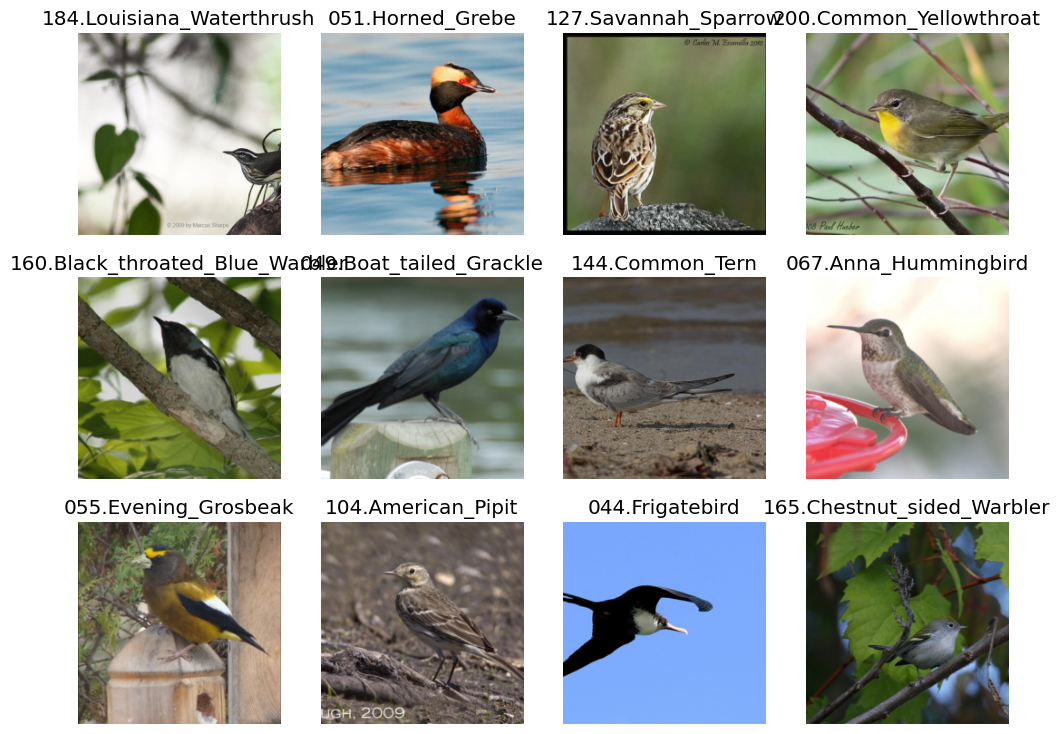

In [ ]:
dls = CUB_200_2011.dataloaders(path/'train')

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

Usando `show_batch()`, comprobamos que se han generado los dataloaders con éxito, mostrando un lote de imágenes a modo de ejemplo, visualizando una serie de aves y las especies a la que pertenecen.



---



Una vez preparados los datos de trabajo, procedemos a definir el modelo a entrenar. En nuestro caso, será un modelo con la arquitectura de ResNet18, preentrenado sobre ImageNet.

# **Arquitectura de ResNet18 para ImageNet**

* Primera capa convolucional 7x7, con 64 filtros, y stride 2, seguida de un MaxPool 3x3, con stride 2.
* A continuación, se realizan 4 etapas, cada una de ellas empleando dos bloques convolucionales, cada bloque compuesto por 2 convoluciones 3x3:

  **1ª etapa** : 2 bloques residuales, cada uno de ellos empleando 2 convoluciones 3x3 con 64 filtros.

  **2ª etapa** : 2 bloques residuales, cada uno de ellos empleando 2 convoluciones 3x3 con 128 filtros.

  **3ª etapa** : 2 bloques residuales, cada uno de ellos empleando 2 convoluciones 3x3 con 256 filtros.

  **4ª etapa** : 2 bloques residuales, cada uno de ellos empleando 2 convoluciones 3x3 con 512 filtros.

  La primera convolución de cada etapa reduce las dimensiones de la imagen a la mitad ( $nº filas/2$ y $nº columnas/2$ ), duplicando el nº de canales. La única excepción es la primera etapa, ya que venimos de haber aplicado la primera convolución y el maxpool, las cuales se encargan ya de aumentar el nº de características y reducir resolución, respectivamente.

* Cabeza del modelo (AveragePool + FullyConnected)

Se definen un total de 18 capas (8 bloques de 2 capas por bloque + convolución inicial + capa lineal final), lo que da nombre a ResNet18.



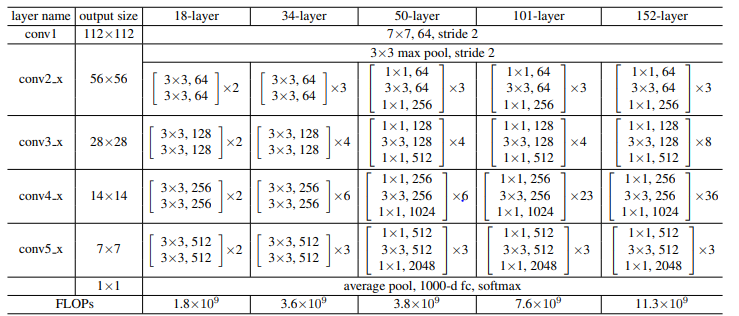

La imagen previa muestra las arquitecturas de diferentes ResNet adaptadas para el dataset de ImageNet. En este caso, nos interesamos por la columna con nombre Resnet18, que es justamente la que emplearemos en este problema de clasificación.

# **Definición del Learner**

Se procede a definir el learner, aportando los dataloaders de train y val, el modelo a entrenar, la función de pérdida (al ser un problema de clasificación,`CrossEntropyLossFlat()`), y métrica para medir el rendimiento del modelo, en este caso, **accuracy**.

Además, crearemos la cabecera que queremos añadir al backbone de ResNet18, aportándola a la hora de definir dicho learner:
- La capa lineal de la cabecera se definirá mediante los siguientes parámetros:
  * 512 nodos de entrada, debido a que la última convolución del backbone emplea 512 filtros.
  * 200 nodos de salida, equivalentes a las 200 clases de nuestro problema.
- No es necesario usar seguidamente después la función de activación **softmax**, ya que la función de pérdida empleada ya la utiliza internamente.

In [ ]:
#personalizo la cabecera que quiero añadir al backbone de ResNet50
custom_head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(512,200)
)

In [ ]:
#ponemos train_bn=False, para congelar también las capas BatchNorm del backbone.
learn = vision_learner(dls,resnet18,loss_func=CrossEntropyLossFlat(),metrics=accuracy,train_bn=False,custom_head=custom_head)
learn.summary()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.3MB/s]


Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

Usando la columna **Trainable**, comprobamos que, efectivamente, todas las capas del backbone se congelan (**False**), entrenando únicamente las capas de la cabecera personalizada, lo que supone un total de 513 parámetros entrenables en la 1º fase del `fine_tune`.

# Entrenamiento del modelo

Procedemos a entrenar el modelo preentrenado usando `fine_tune`:


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

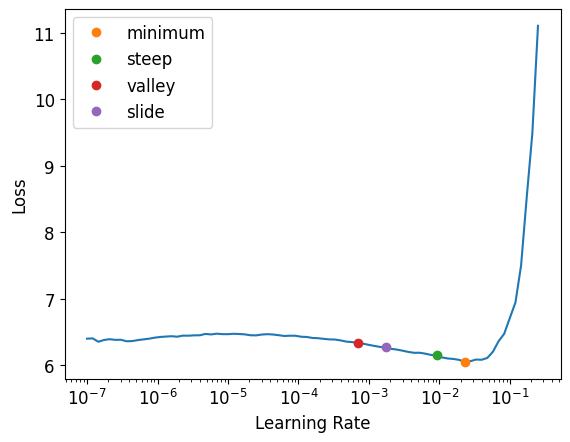

In [ ]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,accuracy,time
0,5.696429,5.181394,0.026711,00:34


Better model found at epoch 0 with valid_loss value: 5.181393623352051.


epoch,train_loss,valid_loss,accuracy,time
0,4.795945,4.648269,0.061770,00:38
1,3.991451,3.659892,0.176962,00:38
2,2.913082,2.738399,0.352254,00:39
3,1.998371,2.237978,0.447412,00:38
4,1.402052,1.956473,0.502504,00:40
5,1.019941,1.801738,0.552588,00:37
6,0.779131,1.730008,0.559265,00:38
7,0.626057,1.687926,0.567613,00:39
8,0.542130,1.669329,0.572621,00:38
9,0.510686,1.675793,0.565943,00:38


Better model found at epoch 0 with valid_loss value: 4.648269176483154.
Better model found at epoch 1 with valid_loss value: 3.6598920822143555.
Better model found at epoch 2 with valid_loss value: 2.738398551940918.
Better model found at epoch 3 with valid_loss value: 2.2379777431488037.
Better model found at epoch 4 with valid_loss value: 1.9564728736877441.
Better model found at epoch 5 with valid_loss value: 1.8017377853393555.
Better model found at epoch 6 with valid_loss value: 1.7300083637237549.
Better model found at epoch 7 with valid_loss value: 1.6879258155822754.
Better model found at epoch 8 with valid_loss value: 1.6693285703659058.


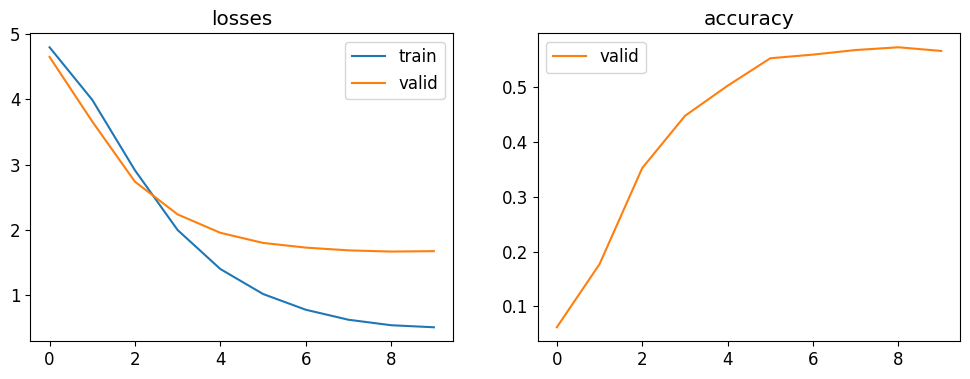

In [ ]:
learn.fine_tune(10,base_lr=lrs.valley,cbs=SaveModelCallback())
learn.recorder.plot_metrics()

Validamos el modelo una vez entrenado, comprobando la pérdida y rendimiento en el conjunto de validacion del mejor modelo obtenido.

In [ ]:
val_loss, val_accuracy = learn.validate()
print(f"Pérdida en val : {val_loss}",f"Accuracy en val : {round(100*val_accuracy,3)}")

Pérdida en val : 1.6693285703659058 Accuracy en val : 57.262


# Rendimiento final del modelo en test

Una vez seleccionado el mejor modelo, evaluamos su rendimiento final sobre el conjunto de test, siendo necesario, primeramente, preparar los datos de test, y a posteriori, pasárselos al modelo entrenado.

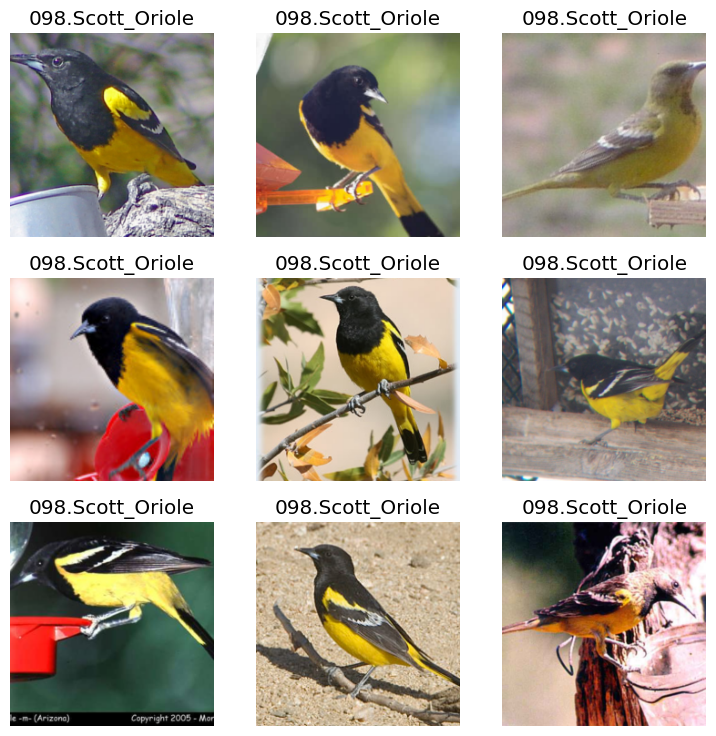

In [ ]:
#dataloader de test a partir de las imagenes de test
test_dl = learn.dls.test_dl(files_test,with_labels=True)
test_dl.show_batch()

In [ ]:
#obtenemos predicciones del modelo sobre test
preds, targs, _ = learn.get_preds(dl=test_dl, with_decoded=True)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  62.4784 %


## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

El aumento de la complejidad de un modelo puede dificultar su interpretación, por lo que acabaremos viendo el modelo como una especie de caja negra que simplemente devuelve una salida frente a un valor de entrada. Por tanto, para poder identificar si nuestro modelo trabaja o no correctamente con las características relevantes para la clasificación (en este caso), se propone como solución el uso del método **Grad-CAM**.

Este método busca producir un mapa de calor que destaque las regiones de la imagen en las que el modelo se ha fijado principalmente a la hora de producir la salida.
GradCAM se puede aplicar sobre cualquier capa del modelo, aunque en este caso optaremos por utilizar la última capa convolucional del backbone.

El procedimiento a seguir es el siguiente:
1. Aplicamos forward propagation sobre la imagen de entrada, hasta llegar a la última capa convolucional de nuestro modelo, tomando los **mapas de características que devuelve esta última capa** (si esta capa emplea X filtros, devolverá X mapas de características).

2. Aplicamos un **Global Average Pooling** (GAP), resumiendo cada mapa de características en un solo valor, obteniendo X valores, cada uno de ellos resultantes de aplicar GAP sobre el mapa de características correspondiente.

3. Definimos una capa lineal con esos X valores de entrada, y tantos nodos de salida como clases existan.

4. Fijando uno de los nodos de salida, sobre el cual queremos obtener el mapa de calor correspondiente, y al tratarse de una capa lineal, se realizará una suma ponderada de los X valores obtenidos en los pasos previos, empleando X pesos *w*.


Hay diferentes variantes a emplear y que difieren básicamente en cómo se calculan dichos pesos. En este caso, al usar **GradCAM**, cada peso se obtiene realizando el **promedio de los gradientes** sobre cada activación del mapa de activaciones de la característica correspondiente

$$w_{k}^{c} = \frac{1}{Z} \sum_{i} \sum_{j} \frac{\partial f^{c}}{\partial A_{ij}^{k}}$$

tal que...
*  $w_{k}^{c}$ : peso asociado al mapa de características $k$
* $Z$ : total de activaciones de cada mapa de características
* $f^{c}$ : función de pérdida
* $A_{ij}^{k}$ : activación $(i,j)$ del mapa de características $k$

Tras ello, realizamos la **suma ponderada de los mapas de características**, empleando los pesos previamente calculados, obteniendo así el **mapa de activación de la clase fijada**.

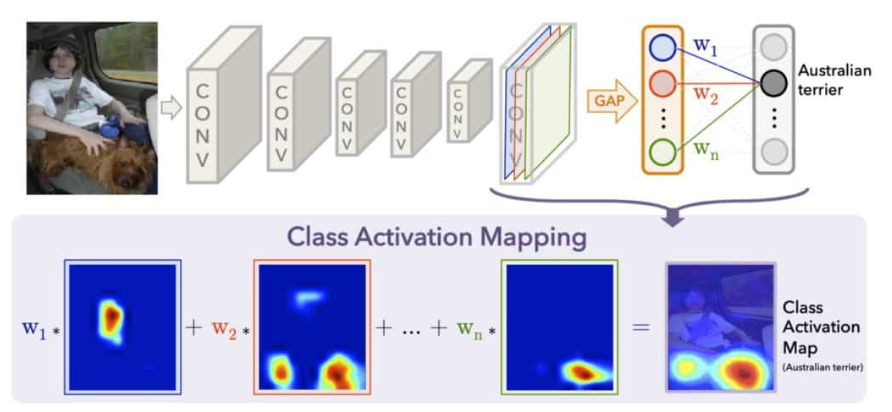

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=db5ba73a77a47d6dd8c237872d473c868b7e6bd8c4d85199189756770728dae0
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


In [ ]:
'''
- Tomamos primeramente el último bloque convolucional de nuestro modelo
- learn.model[0] nos permite accer al cuerpo convolucional principal de ResNet18, en este caso, a las 4 etapas comentadas anteriormente
- Seguidamente, usamos el índice '-1' para acceder a la última etapa
- A posteriori, índice '-1 de nuevo para acceder al último bloque de esta última etapa.
- Finalmente, índice -1 para tomar la última convolución del bloque obtenido
'''
ultima_conv = learn.model[0][-1][-1].conv2
ultima_conv

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from fastai.data.core import DataLoader

Tras tomar la última capa convolucional, generamos el objeto GradCAM, especificando el modelo empleado, y la capa para la cual queremos extraer el mapa de calor asociado. Es importante indicar también la salida que queremos fijar, es decir, la clase.

Queremos visualizar el mapa de calor para 5 imágenes de test que vamos a seleccionar aleatoriamente. Claramente, el mapa de calor de una imagen de test será uno u otro en función de la clase que seleccionemos, en este caso, la clase a la que realmente pertenece dicha imagen de test, con el objetivo de conocer las regiones de la imagen en las que se ha interesado o centrado mayormente el modelo a la hora de predecir la probabilidad de que pertenezca a dicha clase (especie).

In [ ]:
#No he podido implementar el código correspondiente